<a href="https://colab.research.google.com/github/williamsB77/ASL_Mapping/blob/master/app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import all needed libraries
import cv2 
import numpy as np


'4.1.2'

In [0]:
from google.colab import drive
drive.mount('/mntDrive')

**Function Method** --> Things to do

```
- Create a list of already matched ASL to letters for reference
- Parse the input photo
- Find the hand within the photo
- Compare the hand to the reference photos
- Find the best match and output the letter
```



In [0]:
# Method to parse the sequence 
def aslToEnglish (image):
  letter = 0
  # First, Process the dictionary images
  # Reads and processes the image
  im = cv2.imread(image, 1)
  im = cv2.GaussianBlur(im, (5, 5), 0)
  gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  (thr, bw) = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) # Black is foreground, white is background

  # Create a bounding box around the image
  hand = cv2.findContours(bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  (bX, bY, bW, bH) = cv2.boundingRect(hand)

  return letter

**Main Method** --> Things to do: Get input working

In [0]:
# Get the letter requested by the input photo
print("Input your letter:")
image =  # Save image to this from gDrive
eng = aslToEnglish(image)
print("The letter you're looking for is: " + eng)

### Create a list of already matched ASL to letters for reference


In [1]:
!git clone https://github.com/nykekana/ASL_Mapping.git # maybe change?

Cloning into 'ASL_Mapping'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 44 (delta 3), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (44/44), done.


In [0]:
%cd /content/ASL_Mapping/alphabet_dictionary
# !ls
def get_reference_dictionary(path_to_mapping_folder):
  # creates a dictionary of of already matched ASL to letters for reference
  import os
  all_png_files = [file for file in os.listdir(path_to_mapping_folder) if file.endswith('.PNG')]
  image_to_letter_dict = {}
  for file in all_png_files:
    file_name = file[0]
    image_to_letter_dict[file_name] = file
  return image_to_letter_dict

path_to_mapping_folder = '/content/ASL_Mapping/alphabet_dictionary'
get_reference_dictionary(path_to_mapping_folder)

/content/ASL_Mapping/alphabet_dictionary


{'a': 'a.PNG',
 'b': 'b.PNG',
 'c': 'c.PNG',
 'd': 'd.PNG',
 'e': 'e.PNG',
 'f': 'f.PNG',
 'g': 'g.PNG',
 'h': 'h.PNG',
 'i': 'i.PNG',
 'j': 'j.PNG',
 'k': 'k.PNG',
 'l': 'l.PNG',
 'm': 'm.PNG',
 'n': 'n.PNG',
 'o': 'o.PNG',
 'p': 'p.PNG',
 'q': 'q.PNG',
 'r': 'r.PNG',
 's': 's.PNG',
 't': 't.PNG',
 'v': 'v.PNG',
 'w': 'w.PNG',
 'x': 'x.PNG',
 'y': 'y.PNG',
 'z': 'z.PNG'}

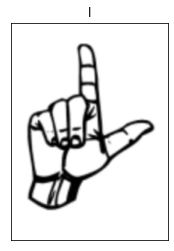

In [0]:
def englishToASL(path_to_mapping_folder, letter):
  # return the filename of ASL 
  letter = letter.lower()
  image_to_letter_dict = get_reference_dictionary(path_to_mapping_folder)
  letter_pic_path = path_to_mapping_folder+'/'+image_to_letter_dict[letter]
  return (letter_pic_path)

# How to use it 
path_to_mapping_folder = '/content/ASL_Mapping/alphabet_dictionary'
letter = "l"
img_file_name = englishToASL(path_to_mapping_folder, letter)

#show photo
%matplotlib inline
from matplotlib import pyplot as plt
import cv2

img = cv2.imread(img_file_name)
plt.imshow(img)
plt.xticks([]),plt.yticks([])
plt.show()


## How to  capture live stream with camera of user

In [0]:
# Source: https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=buJCl90WhNfq

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='user_photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to user_photo.jpg


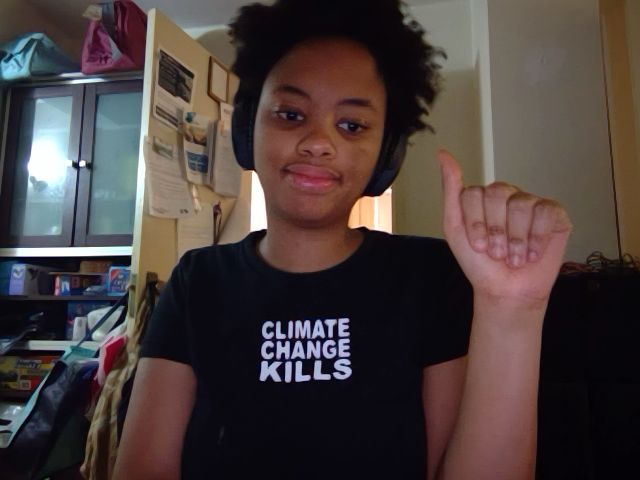

In [4]:
# Source: https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=buJCl90WhNfq

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## IN PROGRESS: Have user take pic in a certain area